# Лабораторная работа №1

## Краткое описание 

Датасет, рассматриваемый в данной лабораторной работе,
предоставляет всесторонний анализ паттернов использования мобильных устройств и классификации поведения пользователей.
Он содержит 700 образцов пользовательских данных, включая такие показатели, как время использования приложений, время включенного экрана, разряд батареи и потребление данных.
Каждая запись классифицируется в одну из пяти категорий поведения пользователей, от легкого до экстремального использования, что позволяет проводить глубокий анализ и моделирование.
Этот набор данных идеально подходит для исследователей, специалистов по обработке данных и аналитиков, заинтересованных в понимании поведения пользователей мобильных устройств и разработке прогнозных моделей в области мобильных технологий и приложений.


## Атрибуты


* User ID: Уникальный идентификатор для каждого пользователя.
* Device Model (string): Модель смартфона пользователя.
* Operating System (string): Операционная система устройства (iOS или Android).
* App Usage Time (int): Ежедневное время, проведенное в мобильных приложениях, измеряется в минутах.
* Screen On Time (float): Среднее количество часов в день, когда экран активен.
* Battery Drain (int): Ежедневное потребление батареи в мАч.
* Number of Apps Installed (int): Общее количество приложений, доступных на устройстве.
* Data Usage (int): Ежедневное потребление мобильных данных в мегабайтах.
* Age (int): Возраст пользователя.
* Gender (string): Пол пользователя (мужской или женский).
* User Behavior Class (int): Классификация поведения пользователя на основе паттернов использования (от 1 до 5).



## Анализ данных


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import seaborn

file = pd.read_csv("../dataset/mobile_devices.csv")
file.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


Выведем информацию о файле и количество пустых полей :


In [4]:
file.info()
file.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

Пустых значений нет, поэтому чистить не придётся :)


In [7]:
# список атрибутов, у которых можно вычислить числовые хар-ки
scalar_attributes = [file['User ID'],
                     file['App Usage Time (min/day)'],
                     file['Screen On Time (hours/day)'],
                     file['Battery Drain (mAh/day)'],
                     file['Number of Apps Installed'],
                     file['Data Usage (MB/day)'],
                     file['Age'],
                     file['User Behavior Class']]

for attr in scalar_attributes:
    print(f"{attr.name} mean = {np.mean(attr)}")
    print(f"{attr.name} STD = {np.std(attr)}")
    print("\n")

User ID mean = 350.5
User ID STD = 202.0723880197391


App Usage Time (min/day) mean = 271.12857142857143
App Usage Time (min/day) STD = 177.0728680861212


Screen On Time (hours/day) mean = 5.272714285714286
Screen On Time (hours/day) STD = 3.0663912812614


Battery Drain (mAh/day) mean = 1525.1585714285713
Battery Drain (mAh/day) STD = 818.55110792404


Number of Apps Installed mean = 50.68142857142857
Number of Apps Installed STD = 26.924072037900235


Data Usage (MB/day) mean = 929.7428571428571
Data Usage (MB/day) STD = 639.9941001003563


Age mean = 38.48285714285714
Age STD = 12.004332211195027


User Behavior Class mean = 2.99
User Behavior Class STD = 1.4004744094158108




Построим гистаграммы распределения значений :

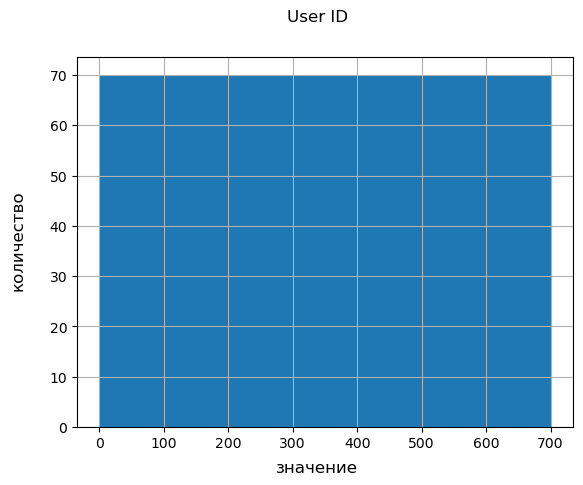

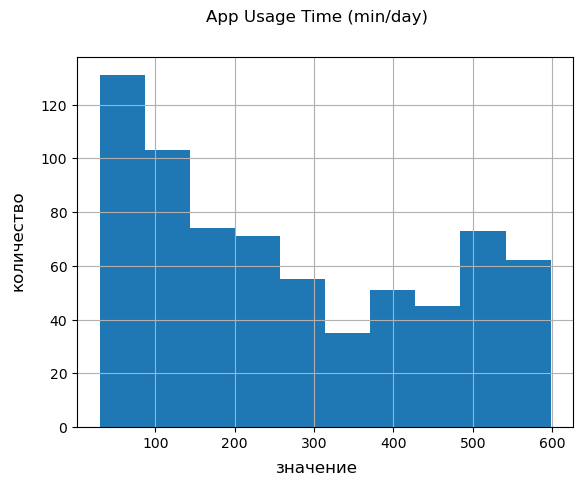

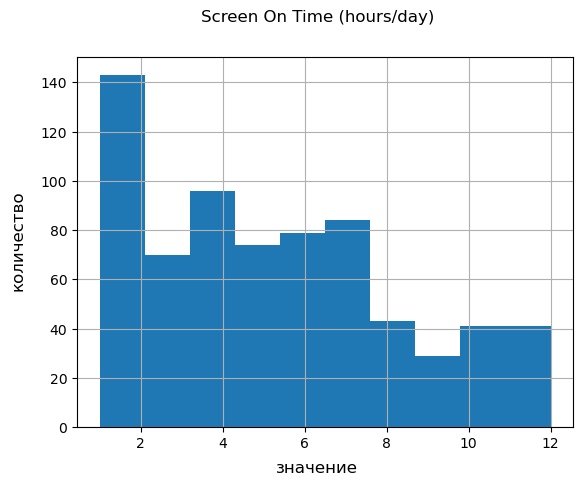

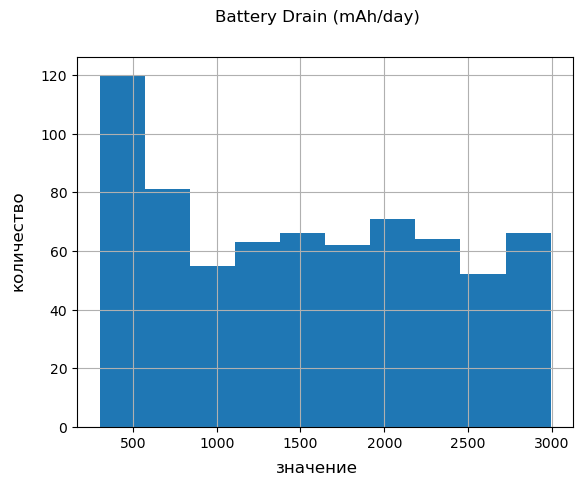

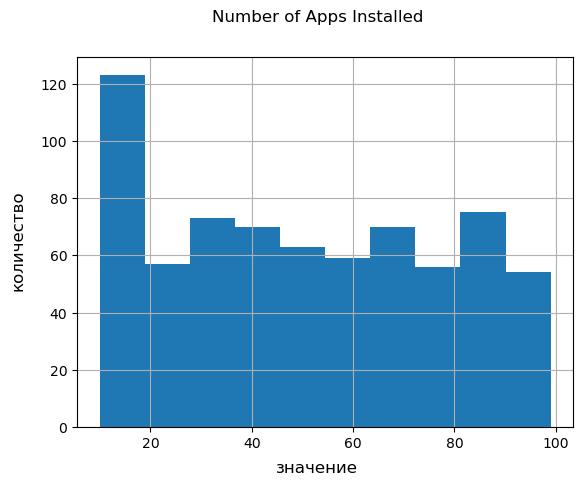

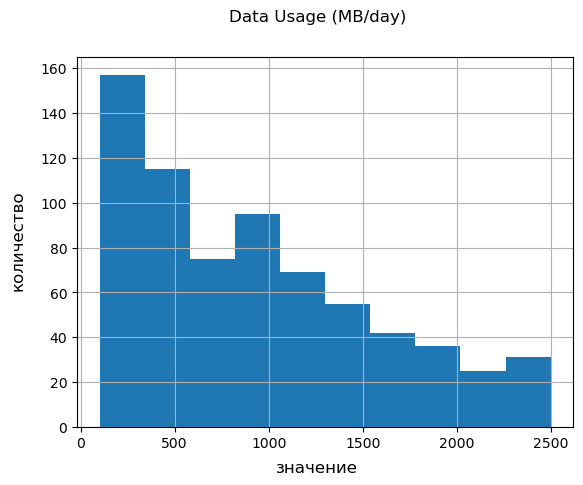

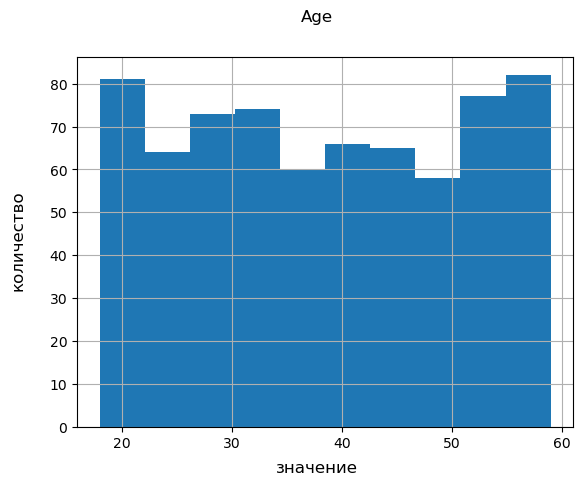

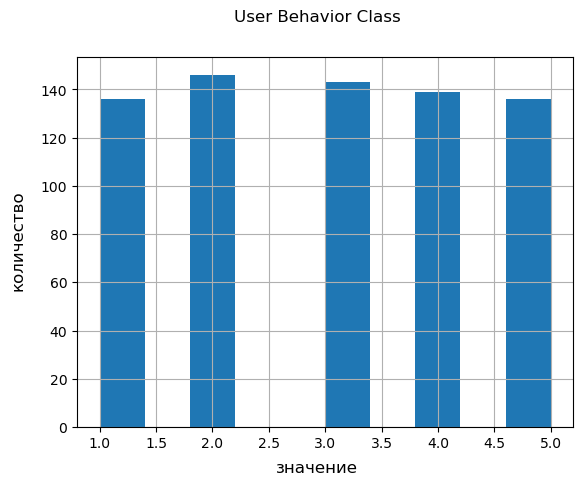

In [8]:
for attr in scalar_attributes:
    fig = plt.figure()
    fig.suptitle(attr.name)
    fig.supxlabel("значение")
    fig.supylabel("количество")
    attr.hist()

Выбросы будем определять по Z-оценке (Z-score < 2) :


In [9]:
from scipy import stats

for attr in scalar_attributes:
    clean_attr = attr[np.abs(stats.zscore(attr)) < 2]
    print(f"Количество строк с выбросами ({attr.name}): {len(attr)}")
    print(f"Количество строк без выбросов ({attr.name}): {len(clean_attr)}")
    print("\n")

Количество строк с выбросами (User ID): 700
Количество строк без выбросов (User ID): 700


Количество строк с выбросами (App Usage Time (min/day)): 700
Количество строк без выбросов (App Usage Time (min/day)): 700


Количество строк с выбросами (Screen On Time (hours/day)): 700
Количество строк без выбросов (Screen On Time (hours/day)): 681


Количество строк с выбросами (Battery Drain (mAh/day)): 700
Количество строк без выбросов (Battery Drain (mAh/day)): 700


Количество строк с выбросами (Number of Apps Installed): 700
Количество строк без выбросов (Number of Apps Installed): 700


Количество строк с выбросами (Data Usage (MB/day)): 700
Количество строк без выбросов (Data Usage (MB/day)): 668


Количество строк с выбросами (Age): 700
Количество строк без выбросов (Age): 700


Количество строк с выбросами (User Behavior Class): 700
Количество строк без выбросов (User Behavior Class): 700




## Корреляция между атрибутами :


Построим матрицу графиков рассеивания :

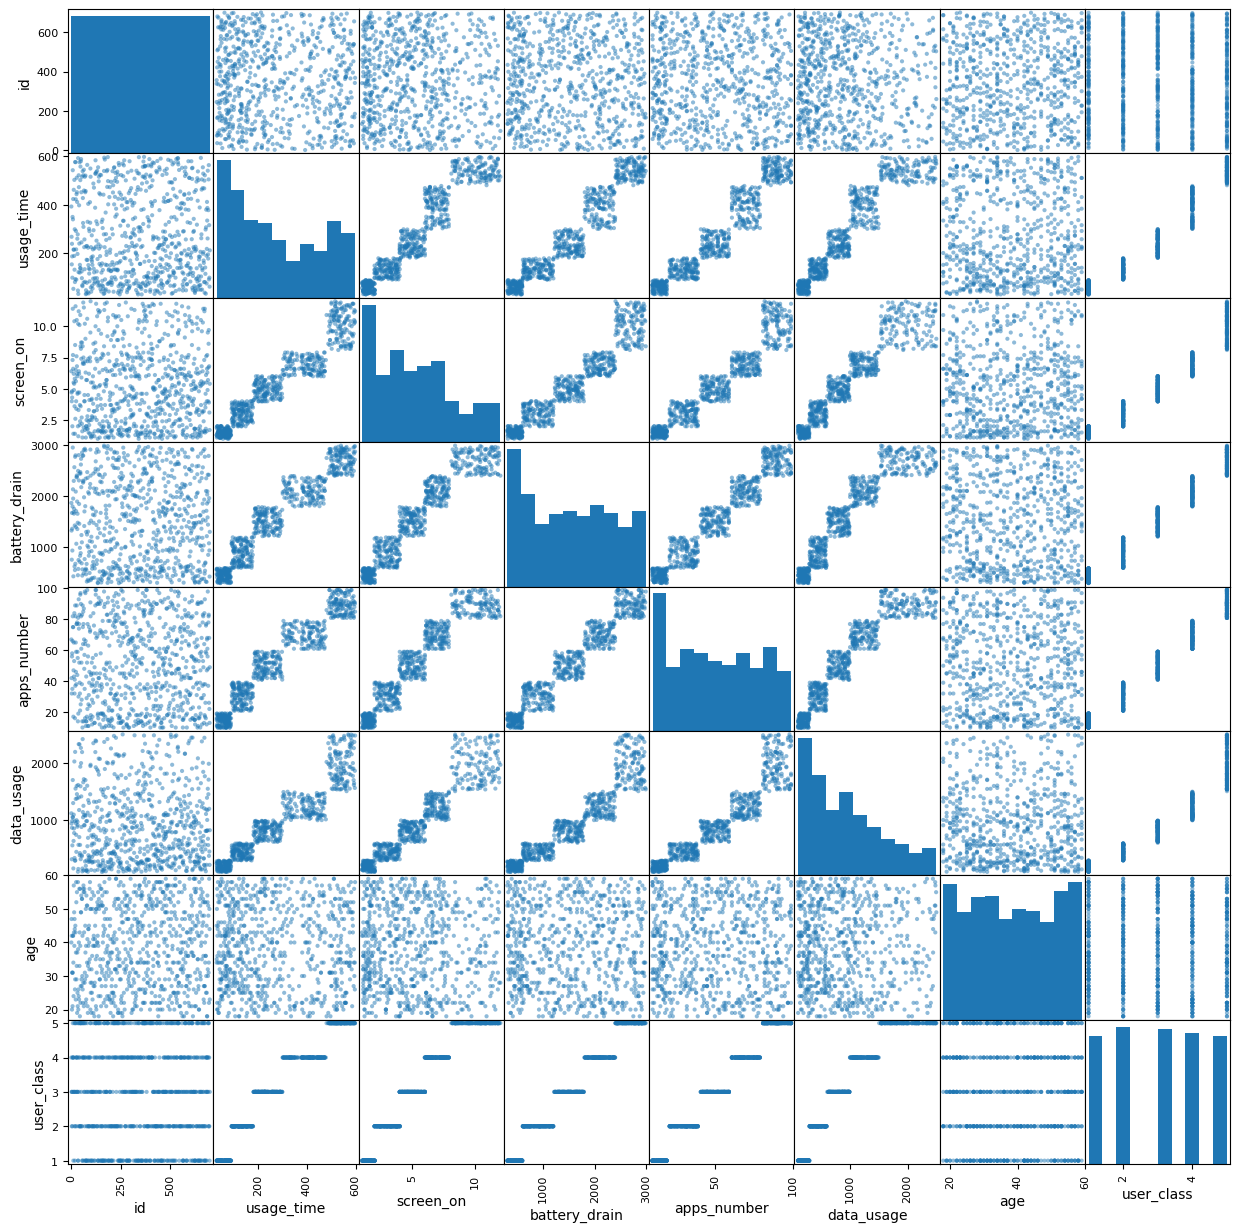

In [10]:
scatter_frame = pd.DataFrame({
    "id": scalar_attributes[0],
    "usage_time": scalar_attributes[1],
    "screen_on": scalar_attributes[2],
    "battery_drain": scalar_attributes[3],
    "apps_number": scalar_attributes[4],
    "data_usage": scalar_attributes[5],
    "age": scalar_attributes[6],
    "user_class": scalar_attributes[7]
})

scatter_matrix = pd.plotting.scatter_matrix(
    scatter_frame,
    figsize=(15, 15) 
)

Рассмотрим матрицу корреляций :


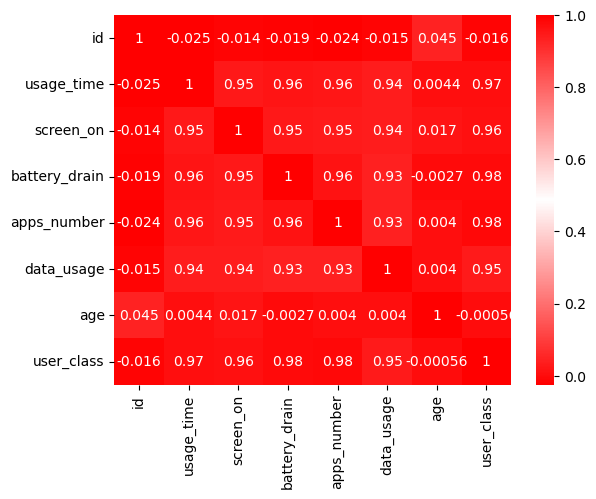

In [11]:
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list('', ['red', 'white', 'red'])
heatmap = seaborn.heatmap(
    scatter_frame.corr(),
    annot=True,
    cmap=cmap
)

Высокая корреляция (0.6 < abs(corr) < 1):

screen_on и usage_time (0.95) - прямая корреляция: закономерно, т.к. экран практически всегда активен при использовании приложений на мобильном устройстве

screen_on и battery_drain (0.95) - прямая корреляция: возможно, так же закономерно, т.к. при включённом экране батарея расходуется быстрее

screen_on и apps_number (0.96) - прямая корреляция

screen_on и data_usage (0.94) - прямая корреляция (похожая закономерность с usage_time)

data_usage и battery_drain (0.93) - прямая корреляция, закономерна между использованием памяти и потреблением батареи

data_usage и usage_time (0.94) - прямая корреляция

data_usage и apps_number (0.93) - прямая корреляция

Отсутствие корреляции (abs(corr) < 0.1):

очевидно, что порядковый номер пользователя (id) почти не будут коррелировать с другими атрибутами

в случае с возрастом пользователя (age) - возможно, если бы выборка пользователей была шире, можно было бы заметить корреляцию между age и, к примеру, usage_time